In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import folium

In [42]:
data_folder = "./data/GBD_data/"
saving_folder = "./data/Cleaned_GBD_data/"
file_list = [i for i in sorted(os.listdir(data_folder)) if 'IHME-GBD' in i]

In [6]:
pdfs = []
for file in file_list:
    print("Reading {} ...".format(file))
    pdfs.append(pd.read_csv(data_folder + file))

Reading IHME-GBD_2017_DATA-302bab91-1.csv ...
Reading IHME-GBD_2017_DATA-302bab91-10.csv ...
Reading IHME-GBD_2017_DATA-302bab91-11.csv ...
Reading IHME-GBD_2017_DATA-302bab91-12.csv ...
Reading IHME-GBD_2017_DATA-302bab91-13.csv ...
Reading IHME-GBD_2017_DATA-302bab91-14.csv ...
Reading IHME-GBD_2017_DATA-302bab91-15.csv ...
Reading IHME-GBD_2017_DATA-302bab91-16.csv ...
Reading IHME-GBD_2017_DATA-302bab91-17.csv ...
Reading IHME-GBD_2017_DATA-302bab91-18.csv ...
Reading IHME-GBD_2017_DATA-302bab91-19.csv ...
Reading IHME-GBD_2017_DATA-302bab91-2.csv ...
Reading IHME-GBD_2017_DATA-302bab91-20.csv ...
Reading IHME-GBD_2017_DATA-302bab91-21.csv ...
Reading IHME-GBD_2017_DATA-302bab91-22.csv ...
Reading IHME-GBD_2017_DATA-302bab91-23.csv ...
Reading IHME-GBD_2017_DATA-302bab91-24.csv ...
Reading IHME-GBD_2017_DATA-302bab91-25.csv ...
Reading IHME-GBD_2017_DATA-302bab91-26.csv ...
Reading IHME-GBD_2017_DATA-302bab91-27.csv ...
Reading IHME-GBD_2017_DATA-302bab91-28.csv ...
Reading IHME-GB

### Data Cleaning

Splitting the dataset according to different measures. Dropping the location_id, measure_id, sex_id, age_id, cause_id, metric_id columns because they are not useful.

In [7]:
cleaned_pdfs = []
for i in range(len(pdfs)):
    cleaned_pdfs.append(pdfs[i].drop(['location_id', 'measure_id', 'sex_id', 'age_id', 'cause_id', 'metric_id'], axis=1))

# Merge into one huge data matrix
pd_all = pd.concat(cleaned_pdfs).reset_index(drop=True)
pd_all.shape

(22396332, 10)

In [8]:
pd_all.head()

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,YLLs (Years of Life Lost),Southeast Asia,Male,5 to 9,Mental disorders,Number,1990,3.834503e-01,6.954307e-01,2.309430e-01
1,YLLs (Years of Life Lost),Southeast Asia,Female,5 to 9,Mental disorders,Number,1990,2.154793e-01,5.261444e-01,1.521684e-01
2,YLLs (Years of Life Lost),Southeast Asia,Both,5 to 9,Mental disorders,Number,1990,5.989296e-01,1.056174e+00,4.024893e-01
3,YLLs (Years of Life Lost),Southeast Asia,Male,5 to 9,Mental disorders,Percent,1990,1.222975e-07,2.263333e-07,7.364287e-08
4,YLLs (Years of Life Lost),Southeast Asia,Female,5 to 9,Mental disorders,Percent,1990,9.316144e-08,2.305999e-07,6.586952e-08


In [9]:
# Get all measure names
measure_names = pd_all.measure_name.unique()
# Group by and get all groups
groups_by = pd_all.groupby('measure_name')
measure_groups = dict.fromkeys(measure_names)
for measure in measure_names:
    measure_groups[measure] = groups_by.get_group(measure)
    print(measure_groups[measure].size)

6336960
53726400
6336960
52176600
52176600
53209800


In [14]:
# Save the groups in csv
for measure in measure_names:
    filename = data_folder+measure+".csv"
    print("Saving {} to {}".format(measure, saving_folder+measure+".csv"))
    #measure_groups[measure].to_csv(filename, compression="zip")
    measure_groups[measure].to_csv(filename)
    print(measure_groups[measure].size)

Saving YLLs (Years of Life Lost) to ./data/Cleaned_GBD_data/YLLs (Years of Life Lost).csv
6336960
Saving Incidence to ./data/Cleaned_GBD_data/Incidence.csv
53726400
Saving Deaths to ./data/Cleaned_GBD_data/Deaths.csv
6336960
Saving Prevalence to ./data/Cleaned_GBD_data/Prevalence.csv
52176600
Saving YLDs (Years Lived with Disability) to ./data/Cleaned_GBD_data/YLDs (Years Lived with Disability).csv
52176600
Saving DALYs (Disability-Adjusted Life Years) to ./data/Cleaned_GBD_data/DALYs (Disability-Adjusted Life Years).csv
53209800


### Data Exploration

In [43]:
# Read CSVs to create pandas dataframes
prevalence = pd.read_csv(data_folder + 'Prevalence.csv')

In [111]:
# Read population data to pandas dataframe
population = pd.read_csv('./data/Population_2015_2017.csv')

In [112]:
population.head()

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_name,val,upper,lower
0,1,Global,1,Male,1,Under 5,2015,44,Population,Number,3.504208e+08,3.587244e+08,3.418668e+08
1,1,Global,1,Male,1,Under 5,2016,44,Population,Number,3.510972e+08,3.600163e+08,3.418204e+08
2,1,Global,1,Male,1,Under 5,2017,44,Population,Number,3.517762e+08,3.613131e+08,3.420698e+08
3,1,Global,1,Male,2,Early Neonatal,2015,44,Population,Number,1.371506e+06,1.402862e+06,1.338876e+06
4,1,Global,1,Male,2,Early Neonatal,2016,44,Population,Number,1.373366e+06,1.407075e+06,1.339479e+06


In [44]:
# Drop unnamed column that used to be indices
prevalence = prevalence.drop(['Unnamed: 0'], axis=1)
prevalence.head()

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
0,Prevalence,"Southeast Asia, East Asia, and Oceania",Male,Under 5,Mental disorders,Number,1990,2.109889e+06,2.684871e+06,1.528950e+06
1,Prevalence,"Southeast Asia, East Asia, and Oceania",Female,Under 5,Mental disorders,Number,1990,1.477937e+06,1.959096e+06,9.918600e+05
2,Prevalence,"Southeast Asia, East Asia, and Oceania",Both,Under 5,Mental disorders,Number,1990,3.587825e+06,4.654473e+06,2.516009e+06
3,Prevalence,"Southeast Asia, East Asia, and Oceania",Male,Under 5,Mental disorders,Percent,1990,2.316367e-02,2.933873e-02,1.667664e-02
4,Prevalence,"Southeast Asia, East Asia, and Oceania",Female,Under 5,Mental disorders,Percent,1990,1.757310e-02,2.323132e-02,1.163680e-02


There are three separate metrics to measure mental illness prevalency in the dataframe:

1. Percent - # of population with that specific disease / # of people with all diseases
2. Number - absolute number of people suffering from the disease
3. Rate

In this case, percent does not provide any useful information because we are not comparing mental illness with any other diseases. What we do want to find however, is the share of population with that disease--hence, we will compare the absolute number metric against the population data to identify the percentage of people who have that disease based on the entire population.

In [45]:
prevalence_percent = prevalence[prevalence.metric_name == 'Percent']
prevalence_number = prevalence[prevalence.metric_name == 'Number']
prevalence_rate = prevalence[prevalence.metric_name == 'Rate']

When we take a look at cause_names, we realize that some of these diseases overlap. For example, mental disorders is a header cause that is essentially just a grouped aggregation of other causes. In total, based on the query we used to obtain this data, there are three levels of causes. We will only use the first two levels because the last level is extremely specific and out of the scope of this project. We therefore create two lists of levels. If we want to look at mental disorders prevalence as a whole, we can filter by cause_name in level_1. If we want to group by more specific cause_types or dig deeper into a specific cause, we can filter by cause_name in level_2.

In [46]:
# Get levels of cause_names. 'Mental disorders' is level 1 because it is an aggregation of all the level 2 causes.
level_1 = ['Mental disorders']
level_2 = ['Schizophrenia', 'Depressive disorders', 'Bipolar disorder', 'Anxiety disorders',
          'Eating disorders', 'Autism spectrum disorders', 'Attention-deficit/hyperactivity disorder', 
          'Conduct disorder', 'Idiopathic developmental intellectual disability', 'Other mental disorders']

### Mental Illness Prevalence from 1990 - 2017

In [130]:
# Since we are comparing how prevalence of mental illness has changed over years, we decided to use absolute number as the metric.
# We filter by only including aggregated rows for all columns except year and cause_name, and we want to group by only level 2 causes.
filtered_data = prevalence_number[(prevalence_number.location_name == 'Global') & 
                                   (prevalence_number.cause_name.isin(level_2)) &
                                   (prevalence_number.sex_name == 'Both') &
                                   (prevalence_number.age_name == 'All Ages')]

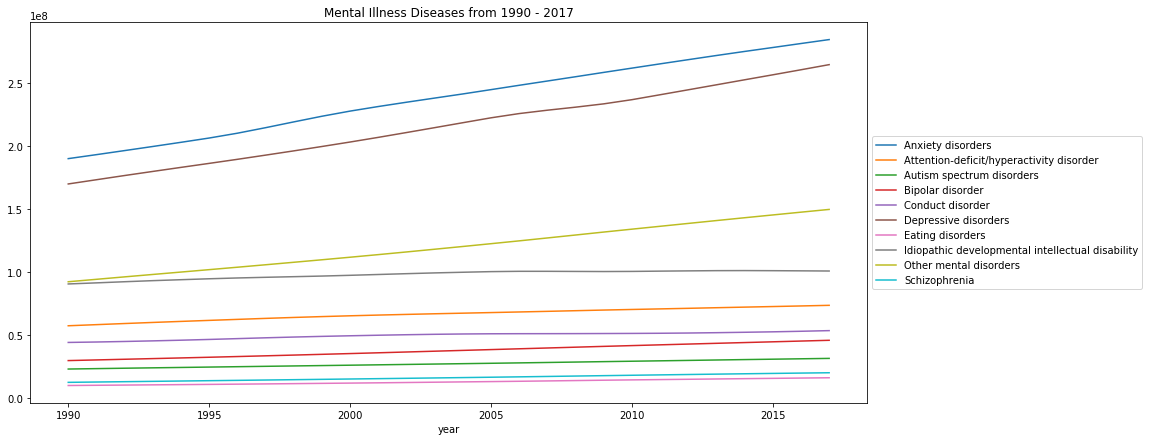

In [48]:
fig, ax = plt.subplots(figsize=(15,7))
filtered_data.groupby(['year', 'cause_name'])['val'].sum().unstack().plot(ax=ax)
#ax.set_yscale("log", nonposx='clip')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Mental Illness Diseases from 1990 - 2017")

In [49]:
filtered_data.groupby(['cause_name'])['val'].sum()

cause_name
Anxiety disorders                                   6.669354e+09
Attention-deficit/hyperactivity disorder            1.855165e+09
Autism spectrum disorders                           7.533336e+08
Bipolar disorder                                    1.044729e+09
Conduct disorder                                    1.379660e+09
Depressive disorders                                6.041749e+09
Eating disorders                                    3.508997e+08
Idiopathic developmental intellectual disability    2.736227e+09
Other mental disorders                              3.353860e+09
Schizophrenia                                       4.449168e+08
Name: val, dtype: float64

We observe that from 1990 - 2017, anxiety disorders and depressive disorders have shown the highest growth in terms of absolute number of people who suffer from the illness, followed by other mental disorders.

### Mental Illness Prevalence by Continent

In [132]:
# Pick the major continents we are interested in
location_list = ['Asia', 'Europe', 'Africa', 'America', 'Oceania']

# We are interested in the most recent data, so we filter by 2017, and aggregate all other columns except location_name
filtered_data = prevalence_number[(prevalence_number.location_name.isin(location_list)) & 
                                   (prevalence_number.cause_name.isin(level_1)) &
                                   (prevalence_number.sex_name == 'Both') &
                                   (prevalence_number.year == 2017) &
                                   (prevalence_number.age_name == 'All Ages')]

In [133]:
filtered_data.head()

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
3785667,Prevalence,Oceania,Both,All Ages,Mental disorders,Number,2017,1.305205e+06,1.386222e+06,1.229713e+06
4176004,Prevalence,America,Both,All Ages,Mental disorders,Number,2017,1.395607e+08,1.453860e+08,1.342814e+08
4314446,Prevalence,Africa,Both,All Ages,Mental disorders,Number,2017,1.447193e+08,1.532074e+08,1.365047e+08
4394115,Prevalence,Europe,Both,All Ages,Mental disorders,Number,2017,1.148550e+08,1.192519e+08,1.107358e+08
4485287,Prevalence,Asia,Both,All Ages,Mental disorders,Number,2017,5.677062e+08,6.018614e+08,5.355450e+08


In [134]:
# First filter the population data to have only the information we need.
pop_filtered = population[(population.location_name.isin(location_list)) & 
                           (population.sex_name == 'Both') &
                           (population.year_id == 2017) &
                           (population.age_group_name == 'All Ages')]
pop_filtered.head()

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_name,val,upper,lower
16424,44559,Africa,3,Both,22,All Ages,2017,44,Population,Number,1.258205e+09,1.293509e+09,1.219106e+09
91835,44560,America,3,Both,22,All Ages,2017,44,Population,Number,1.002874e+09,1.052545e+09,9.527388e+08
138518,44561,Asia,3,Both,22,All Ages,2017,44,Population,Number,4.500819e+09,4.716741e+09,4.266308e+09
213929,44562,Europe,3,Both,22,All Ages,2017,44,Population,Number,8.460316e+08,8.681750e+08,8.236032e+08
428192,21,Oceania,3,Both,22,All Ages,2017,44,Population,Number,1.260273e+07,1.365428e+07,1.158378e+07


In [138]:
# Join the prevalency data with population data so we can get the prevalency as a percentage of population
filter_data_perc = pd.merge(filtered_data, pop_filtered, how='inner', on=['location_name'])

# Create new column as prevalency percentage of population
filter_data_perc['prevalency_percentage'] = filter_data_perc['val_x'] / filter_data_perc['val_y'] * 100
filter_data_perc.head()

,measure_name_x,location_name,sex_name_x,age_name,cause_name,metric_name_x,year,val_x,upper_x,lower_x,...,age_group_id,age_group_name,year_id,measure_id,measure_name_y,metric_name_y,val_y,upper_y,lower_y,prevalency_percentage
0,Prevalence,Oceania,Both,All Ages,Mental disorders,Number,2017,1.305205e+06,1.386222e+06,1.229713e+06,...,22,All Ages,2017,44,Population,Number,1.260273e+07,1.365428e+07,1.158378e+07,10.356528
1,Prevalence,America,Both,All Ages,Mental disorders,Number,2017,1.395607e+08,1.453860e+08,1.342814e+08,...,22,All Ages,2017,44,Population,Number,1.002874e+09,1.052545e+09,9.527388e+08,13.916080
2,Prevalence,Africa,Both,All Ages,Mental disorders,Number,2017,1.447193e+08,1.532074e+08,1.365047e+08,...,22,All Ages,2017,44,Population,Number,1.258205e+09,1.293509e+09,1.219106e+09,11.502037
3,Prevalence,Europe,Both,All Ages,Mental disorders,Number,2017,1.148550e+08,1.192519e+08,1.107358e+08,...,22,All Ages,2017,44,Population,Number,8.460316e+08,8.681750e+08,8.236032e+08,13.575729
4,Prevalence,Asia,Both,All Ages,Mental disorders,Number,2017,5.677062e+08,6.018614e+08,5.355450e+08,...,22,All Ages,2017,44,Population,Number,4.500819e+09,4.716741e+09,4.266308e+09,12.613397


In [139]:
# Group data by location_name and get the mean of the 'val'
continent_mental_illness = filter_data_perc.groupby(['location_name'])['prevalency_percentage'].mean().reset_index()

# Change America to North America in order to prepare for choropleth map graphing
continent_mental_illness.at[1, 'location_name'] = 'North America'

# Add South America where values are the same as North America
NA_percentage = continent_mental_illness.iloc[1, 1]
continent_mental_illness.loc[5] = ['South America', NA_percentage]

# Change column names for easier understanding
continent_mental_illness.columns = ['continent', 'percentage']

# Sort Continents by Descending Mental Illness Prevalence
continent_mental_illness.sort_values(by=['percentage'], ascending=False)

,continent,percentage
1,North America,13.916080
5,South America,13.916080
3,Europe,13.575729
2,Asia,12.613397
0,Africa,11.502037
4,Oceania,10.356528


North and South America have the highest mental illness prevalence measured by percentage of the population, while Oceania has the least.

In [140]:
# This topojson file of the world's continents was obtained from https://github.com/deldersveld/topojson WITH PERMISSION under MIT License
continents = json.load(open(r'world-continents.json'))

In [142]:
# Plot the map
world_map = folium.Map(location=[46.8182, 8.2275], tiles='cartodbpositron', zoom_start=1.5)

world_map.choropleth(geo_data=continents,
                     data=continent_mental_illness,
                     topojson='objects.continent',
                     columns=['continent', 'percentage'],
                     key_on='properties.continent',
                     fill_color='GnBu', fill_opacity=1, line_opacity=0.2,
                     legend_name='Share of Population with Mental Illness (%)')

world_map

In [55]:
# Save as HTML so it can render on Github
world_map.save('Mental_Illness_by_Continent.html')

### Mental Illness Prevalence by Country

In [145]:
data_folder_per_country = "./data/GBD_data_per_country/"
saving_folder_per_country = "./data/Cleaned_GBD_data_per_country/"

# Read CSVs to create pandas dataframes
prevalence_country = pd.read_csv(saving_folder_per_country + 'Prevalence.csv')

In [146]:
# Drop unnamed column that used to be indices
prevalence_country = prevalence_country.drop(['Unnamed: 0'], axis=1)
prevalence_country.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Prevalence,Argentina,Male,Under 5,Mental disorders,Number,1990,34230.014533,42232.318351,26404.990883
1,Prevalence,Argentina,Female,Under 5,Mental disorders,Number,1990,22587.265705,29354.075120,15751.483898
2,Prevalence,Argentina,Both,Under 5,Mental disorders,Number,1990,56817.280238,71377.613398,42672.372073
3,Prevalence,Argentina,Male,Under 5,Mental disorders,Percent,1990,0.026874,0.033573,0.020716
4,Prevalence,Argentina,Female,Under 5,Mental disorders,Percent,1990,0.017577,0.022868,0.012230


In [154]:
prevalence_number_country = prevalence_country[prevalence_country.metric == 'Number']

In [155]:
# We are interested in the most recent data, so we filter by 2017, and aggregate all other columns except location_name
filtered_data = prevalence_number_country[(prevalence_number_country.cause.isin(level_1)) &
                                   (prevalence_number_country.sex == 'Both') &
                                   (prevalence_number_country.year == 2016) &
                                   (prevalence_number_country.age == 'All Ages')]
filtered_data.head()

,measure,location,sex,age,cause,metric,year,val,upper,lower
9953534,Prevalence,South Africa,Both,All Ages,Mental disorders,Number,2016,6.727338e+06,7.046341e+06,6.441659e+06
9962795,Prevalence,Jamaica,Both,All Ages,Mental disorders,Number,2016,3.710418e+05,3.877910e+05,3.548007e+05
9964565,Prevalence,Nepal,Both,All Ages,Mental disorders,Number,2016,3.603885e+06,3.847697e+06,3.363379e+06
9979220,Prevalence,Central Latin America,Both,All Ages,Mental disorders,Number,2016,2.593640e+07,2.709588e+07,2.486228e+07
9982199,Prevalence,United States,Both,All Ages,Mental disorders,Number,2016,5.297099e+07,5.532132e+07,5.082130e+07


In [156]:
# First filter the population data to have only the information we need.
pop_filtered = population[(population.sex_name == 'Both') &
                           (population.year_id == 2017) &
                           (population.age_group_name == 'All Ages')]
pop_filtered.head()

,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_name,val,upper,lower
863,1,Global,3,Both,22,All Ages,2017,44,Population,Number,7.640466e+09,7.867140e+09,7.394646e+09
2060,478,World Bank Regions,3,Both,22,All Ages,2017,44,Population,Number,7.612035e+09,7.836788e+09,7.369101e+09
3257,479,WHO region,3,Both,22,All Ages,2017,44,Population,Number,7.584625e+09,7.809231e+09,7.341699e+09
4454,4743,European Union,3,Both,22,All Ages,2017,44,Population,Number,5.123689e+08,5.255291e+08,4.998754e+08
5651,44534,Commonwealth,3,Both,22,All Ages,2017,44,Population,Number,2.515241e+09,2.670092e+09,2.366691e+09


In [157]:
# Join the prevalency data with population data so we can get the prevalency as a percentage of population
filter_data_perc = pd.merge(filtered_data, pop_filtered, how='inner', left_on=['location'], right_on=['location_name'])

# Create new column as prevalency percentage of population
filter_data_perc['prevalency_percentage'] = filter_data_perc['val_x'] / filter_data_perc['val_y'] * 100
filter_data_perc.head()

,measure,location,sex,age,cause,metric,year,val_x,upper_x,lower_x,...,age_group_id,age_group_name,year_id,measure_id,measure_name,metric_name,val_y,upper_y,lower_y,prevalency_percentage
0,Prevalence,South Africa,Both,All Ages,Mental disorders,Number,2016,6.727338e+06,7.046341e+06,6.441659e+06,...,22,All Ages,2017,44,Population,Number,5.495286e+07,6.064081e+07,4.902787e+07,12.242016
1,Prevalence,Jamaica,Both,All Ages,Mental disorders,Number,2016,3.710418e+05,3.877910e+05,3.548007e+05,...,22,All Ages,2017,44,Population,Number,2.779264e+06,3.084127e+06,2.466424e+06,13.350361
2,Prevalence,Nepal,Both,All Ages,Mental disorders,Number,2016,3.603885e+06,3.847697e+06,3.363379e+06,...,22,All Ages,2017,44,Population,Number,2.989152e+07,3.282571e+07,2.662107e+07,12.056543
3,Prevalence,Central Latin America,Both,All Ages,Mental disorders,Number,2016,2.593640e+07,2.709588e+07,2.486228e+07,...,22,All Ages,2017,44,Population,Number,2.554890e+08,2.714332e+08,2.386713e+08,10.151669
4,Prevalence,United States,Both,All Ages,Mental disorders,Number,2016,5.297099e+07,5.532132e+07,5.082130e+07,...,22,All Ages,2017,44,Population,Number,3.248390e+08,3.628271e+08,2.886043e+08,16.306844


In [160]:
country_mental_illness = filter_data_perc.groupby(['location'])['prevalency_percentage'].mean().reset_index()

# Change column names for easier understanding
country_mental_illness.columns = ['country', 'percentage']

# Sort Continents by Descending Mental Illness Prevalence
country_mental_illness.sort_values(by=['percentage'], ascending=False)

# Change Russian Federation to Russia in order to prepare for choropleth map graphing
country_mental_illness.loc[(country_mental_illness['country']=='Russian Federation'), 'country'] = 'Russia'

country_mental_illness.head()

,country,percentage
0,Afghanistan,14.709443
1,Africa,11.215642
2,Albania,11.150033
3,Algeria,13.605699
4,America,13.791402


In [161]:
countries = json.load(open(r'world-countries-sans-antarctica.json'))

In [164]:
# Plot the map
world_map = folium.Map(location=[46.8182, 8.2275], tiles='cartodbpositron', zoom_start=1.5)

world_map.choropleth(geo_data=countries,
                     data=country_mental_illness,
                     topojson='objects.countries1',
                     columns=['country', 'percentage'],
                     key_on='properties.name',
                     fill_color='GnBu', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='Share of Population with Mental Illness in 2017')

world_map

In [163]:
# Save as HTML so it can render on Github
world_map.save('Mental_Illness_by_Country.html')

### Mental Illness Prevalence by Age

In [56]:
ages_in_order = ['1 to 4', '5 to 9', '10 to 14', '15 to 19', '20 to 24', '25 to 29',
       '30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54',
       '55 to 59', '60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89',
       '90 to 94', '95 plus']

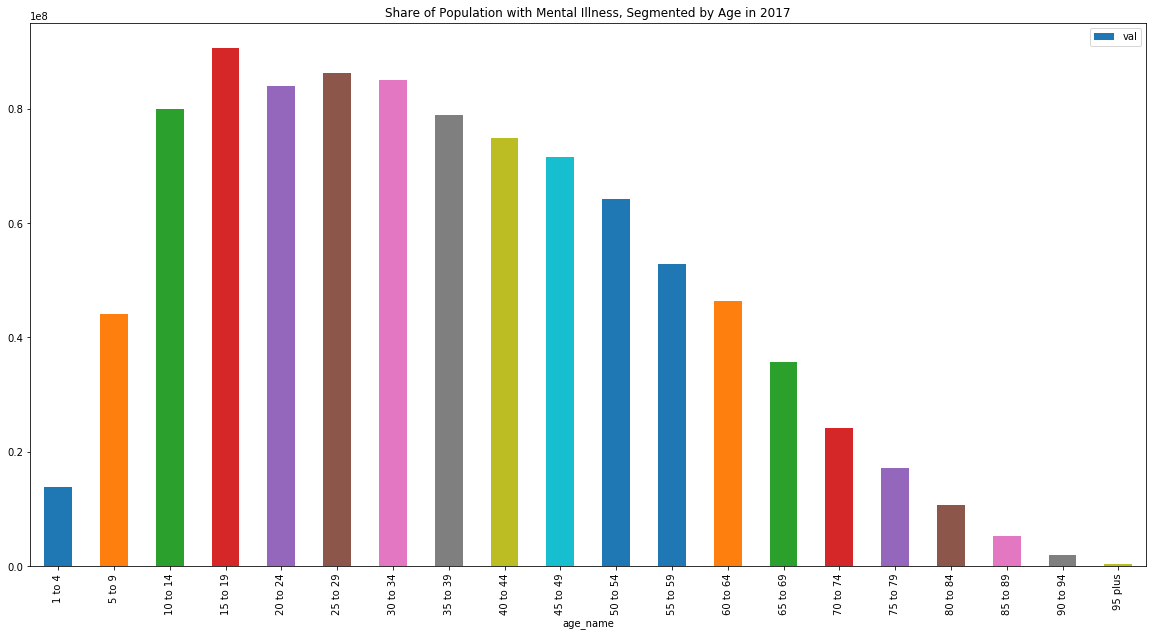

In [166]:
# aggregate all other columns except age
filtered_data = prevalence_number[(prevalence_number.location_name == 'Global') & 
                                   (prevalence_number.cause_name.isin(level_1)) &
                                   (prevalence_number.sex_name == 'Both') &
                                   (prevalence_number.year == 2017)]

# filter population by aggregating all other columns except age
pop_filtered = population[(population.location_name == 'Global') &
                          (population.sex_name == 'Both') &
                          (population.year_id == 2017)]

# Join the prevalency data with population data so we can get the prevalency as a percentage of population
filter_data_perc = pd.merge(filtered_data, pop_filtered, how='inner', left_on=['age_name'], right_on=['age_group_name'])

# Create new column as prevalency percentage of population
filter_data_perc['prevalency_percentage'] = filter_data_perc['val_x'] / filter_data_perc['val_y'] * 100

# Filter out only the ages in ages_in_order list
age_data = filtered_data[filtered_data.age_name.isin(ages_in_order)]
age_data = age_data.groupby(['age_name'])['val'].mean().reset_index()

# Create mapping to display graph in order of age
mapping = {day: i for i, day in enumerate(ages_in_order)}
key = age_data['age_name'].map(mapping)
age_data = age_data.iloc[key.argsort()]

# Plot prevalency percentage by age
age_data.plot.bar(x='age_name', y='val', figsize=(20,10), title="Share of Population with Mental Illness, Segmented by Age in 2017")

Based on the above graph, mental illness peaks during the ages of 15-19, which is often when a person is in high-school, or just beginning university/college. It is possible that the stress of living away from home for the first time or high school drama could be factors that contribute to such a high mental illness percentage. The graph is left-skewed, indicating that mental illness is more prevalent during a person's early stages of life. Mental illness is lowest during 95+ and 1-4 which makes sense because people are less stressed and have fewer responsibilities as a child. 